<center> 

# Confidence Intervals and Bootstrap
  

## Dr. Lange- University of Chicago
## Data 11800 - Winter 2024 

<img src="https://raw.githubusercontent.com/amandakube/Data118LectureImages/main/UChicago_DSI.png" alt="UC-DSI" width="500" height="600">
    
</center>

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Last time: Hypothesis Testing and AB Testing

In **hypothesis testing** you are answering the question, “Is the population like this or not?”
Or "Is our observed sample likely to be compatible with a null distribution? "

We could also be interested In **estimation**, you are answering the question, “What is the population like?” 

## Estimation and Confidence Intervals

Let's consider now the problem of estimation: use a sample statistic as an estimator of a parameter of the population. Is this a good estimator? How can we use simulations to learn about properties of estimators?

We estimate from a known population to understand properties of the estimator.


Use a sample statistic as an estimator of a parameter of the population.

If we report only the estimator, we probably will not hit the exact population parameter. 

If we report a range of plausible values we have a good shot at capturing the parameter.

A plausible range of values for the population parameter is called a **confidence interval (CI)**.




We will also show how to calculate 95% and 99% confidence intervals. We first need to talk about percentiles.

### Percentiles and quantiles 

**Median:** The value that splits an ordered lists in two halves.

**Percentile:** Let $p$ be a number between $0$ and $100$. The $p$-th percentile of a collection is a value $v$ that divides the data so that 

-  $p\%$ are $\leq v$ and 

-  $(100-p)\%$ are $> v$.

The 0.5 percentile is the median.

**NOTE**: Percentile has many different definitions (as we shall soon see) in general all these values agree approximately for large data sets, but may differ substantially for small ones.

In words:  $p$-th percentile is the score that is less than or equal to $p\%$ of the scores.

For example, Suppose we have the array
```python
elements= np.array([43, 20, 51, 7, 28, 34])
```

In [3]:
elements = np.array([43, 20, 51, 7, 28, 34])

np.sort(elements)

array([ 7, 20, 28, 34, 43, 51])

In [4]:
#note we might not always get a value from the data
np.percentile(elements,50)  #the median!

31.0

In [5]:
# the quantile function in numpy 
np.quantile(elements,0.5)

31.0

### An optional aside on more info about percentile in numpy.

(we will be skipping this in class)

Our definition of percentile, above is what you've likely seen if you've encountered the term before. 
However, it has a problem, for instance consider our sorted data 


```[ 7, 20, 28, 34, 43, 51]```


 - If we try to determine the $10$-th percentile. As the data set only has $6$ elements, for any value $V$ either $0\%$ of the data lies below $V$ or at least $\frac{1}{6} \approx 16.7\%$ of the data lies below $V$.

Despite this the function np.percentile still returns a value

In [6]:
elements = np.array([43, 20, 51, 7, 28, 34])
np.sort(elements)

array([ 7, 20, 28, 34, 43, 51])

In [7]:
np.percentile(elements,10)

13.5

In [8]:
#same answer this way too.
np.quantile(elements, 0.1)

13.5

Surprisingly this value is greater than $7$. The ```np.percentile``` function can be described using the following definition of percentile. 

### end of optional aside

**Percentile:** Let $V$ be an array. The $p$-th percentile of $V$ is the value $p\%$ of the way from the minimum to the maximum in a sorted copy of $V$. If we end up between values a weighted average is used.

With this definition: 
*   The $0$-th percentile is the minimum value.
*   The $50$-th percentile is the median.
*   The $100$-th percentile is the maximum value.

### For our example array

In [9]:
elements = np.array([43, 20, 51, 7, 28, 34])
np.sort(elements)

array([ 7, 20, 28, 34, 43, 51])

In [10]:
print("0-th percentile is", np.percentile(elements,0))
print("20-th percentile is", np.percentile(elements,20))
print("40-th percentile is", np.percentile(elements,40))
print("60-th percentile is", np.percentile(elements,60))
print("80-th percentile is", np.percentile(elements,80))
print("100-th percentile is", np.percentile(elements,100))

0-th percentile is 7.0
20-th percentile is 20.0
40-th percentile is 28.0
60-th percentile is 34.0
80-th percentile is 43.0
100-th percentile is 51.0


Another way to split up data is with quartiles. This splits data into $4$ chunks of equal size.

<center>
<img src = "https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/Probability/quantile.png" width="400" style="display: inline-block; margin: 0" />
</center>

The ```np.percentile``` has a few options if you want slightly different behavior. 

 - Alternately ```np.quantile``` allows you to input numbers representing probabilities between $0$ and $1$, as opposed to percents.

In [11]:
print(np.quantile(elements,0.17))
print(np.percentile(elements,17))

18.05
18.05


**Some other options for percentile in default settings**

In [12]:
#Recall our array:

np.sort(elements)

array([ 7, 20, 28, 34, 43, 51])

In [13]:
# np.quantile and np.percentile have options for what to yield
interp=['linear', 'higher', 'lower', 'nearest', 'midpoint']

#We used linear (corresponds to a weighted average)


# np.quantile and np.percentile have options for what to yield
interp=['linear', 'higher', 'lower', 'nearest', 'midpoint']
for i in interp: 
    print(i,np.quantile(elements,.5,interpolation=i))


linear 31.0
higher 34
lower 28
nearest 28
midpoint 31.0


## Confidence Intervals

Given a population and a parameter of interest, $\theta$

 - Estimator: a function of data, $\hat{\theta}$

 - If we report only the estimator, we probably won’t hit the exact population parameter. If we report a range of plausible values we have a good shot at capturing the parameter.

 - A plausible range of values for the population parameter is called a confidence interval (CI).

How do we calculate a confidence interval....depends on what we know about the distribution.

#### Option 1: Assume we know distribution for $\hat{\theta} - \theta$

<center>
<img src = "https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/Probability/ci_image_1.png" width="400" style="display: inline-block; margin: 0" />
</center>


$\theta$ - the population parameter of interest


$\hat{\theta}$  - estimate based on a sample of n observations

Assume that the sampling distribution for $\hat{\theta} - {\theta}$  is known


From the picture above, with probability 0.98:
$L_0 \leq \hat{\theta}  −\theta  \leq U_0$


$\hat{\theta}  −U_0 \leq \theta \leq\hat{\theta}  −L_0$


We call $[\hat{\theta} −U_0, \hat{\theta} −L_0]$ a $98\%$ confidence interval. Or a confidence interval at confidence level $98\%$

### Interpretation of Confidence Intervals

What does “98% confidence” mean

<center>
<img src = "https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/Probability/ci_image2.png" width="500" style="display: inline-block; margin: 0" />
</center>


 - The probability statements we made were about the distribution of $\hat{\theta}-\theta$.

 - About 98% of the intervals constructed like this will cover the true population parameter $\theta$.

 - After using a sample to construct an interval, the constructed interval either covers $\theta$ or not. We don’t know!

##### Option 2: Suppose we know the sampling distribution for $\hat{\theta}$ 

<center>
<img src = "https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/Probability/ci_image3.png" width="500" style="display: inline-block; margin: 0" />
</center>

 - Assume that the sampling distribution for $\hat{\theta}$ is known

 - Assume that it is symmetric around $\theta$

 - Then, $U_1 −\theta = \theta −L_1 = W$ (width)

 - From the picture above, with probability 0.90:
$$|\hat{\theta} −\theta|\leq W$$


$$\hat{\theta} −W \leq \theta  \leq \hat{\theta} + W$$

 -We call $[\hat{\theta} −W , \hat{\theta}+ W ]$ a 90% confidence interval

### How to calculate confidence intervals (CI)

To calculate confidence intervals we need the sampling
distribution of $\hat{\theta}$ or $\hat{\theta} −\theta$


 - Classical statistical methods use mathematics to solve this....we use simulation:
 
 
 - In Option 1, (know distribution $\hat{\theta} −\theta$):  CI is $[\hat{\theta} −U_0, \hat{\theta} −L_0]$

        
 - In Option  2, (know distribution $\hat{\theta}$): CI is $[\hat{\theta} −W , \hat{\theta} + W ]$


### Example


## Global warming 


#### What percentage of Americans believe in global warming? Do the beliefs differ by gender or political party? 

Gallup's annual survey about the environment, conducted March 2018, found that Americans' opinions about global warming, like many other issues, have increasingly become politically polarized:

https://news.gallup.com/poll/231530/global-warming-concern-steady-despite-partisan-shifts.aspx




To investigate the public beliefs on global warming, we downloaded data from Gallup Analytics (used to be freely available to everybody on University of Chicago campus):

https://analyticscampus.gallup.com/Tables/


We will focus first on the following question.
*Thinking about what is said in the news, in your view is the seriousness of global warming:*
-  generally exaggerated
-  generally correct
-  or is it generally underestimated?	

We will construct a 99% confidence interval for proportion of Americans who believe that **the seriousness of global warming is generally underestimated.**

In [14]:
gallup_df = pd.read_csv('https://raw.githubusercontent.com/SusannaLange/Data_118_Images/main/Data/GlobalWarming.csv')

gallup_df.head(7)

,Time,Demographic,Demographic Value,Generally exaggerated,Generally correct,Generally underestimated,DK/RF,N Size
0,2016,Aggregate,Aggregate,34%,25%,40%,2%,"1,019"
1,2016,Gender,Male,41%,24%,34%,1%,527
2,2016,Gender,Female,27%,25%,45%,3%,492
3,2016,Party,Democrat,10%,28%,58%,4%,327
4,2016,Party,Independent/Other,36%,26%,36%,2%,367
5,2015,Aggregate,Aggregate,42%,21%,35%,2%,"1,025"
6,2015,Gender,Male,49%,15%,33%,3%,531


Parameter of interest?? Population Proportion

We will focus on 2016 data

In order to build our inference on the parameter of interest (population proportion), we need to know the counts of subjects in each category. Note that the data only shows the sample proportions rounded to the "nearest" integer.

We know

- N = 1019

- Suppose we know the population proportion of those who answered 'generally underestimated' is .4

- individuals were independently sampled

### So we can simulate the sampling distribution 

In [15]:
# simulate a sample of n subjects with a given probability of answering "yes"
# output sample proportions
def gallup_sim(n,pyes,nsim):
    outcomes = np.array([])
    for i in np.arange(nsim):
        outcomes = np.append(outcomes, sum(np.random.choice(['Yes','Other'], n, p=[pyes, 1-pyes])=='Yes'))
    return outcomes/n

In [16]:
gallup_sim(1019,0.4,5)

array([0.39450442, 0.41020608, 0.38469087, 0.38959764, 0.40235525])

If we know the population proportion, we can simulate the sampling distribution of the sample proportion.

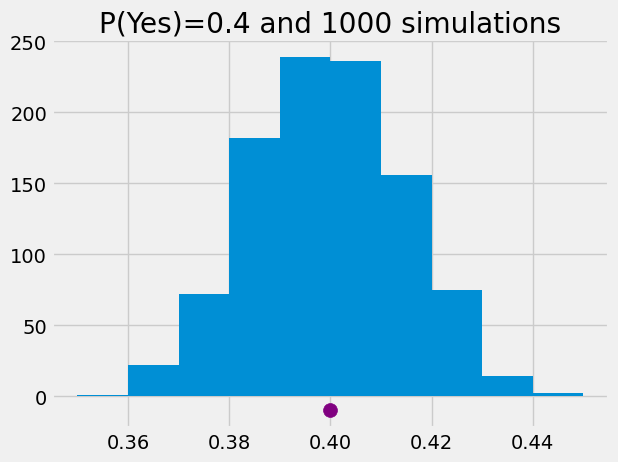

In [17]:
# we are simulating now the sampling distribution when the population parameter is 0.4
np.random.seed(0)
simulation_results=gallup_sim(1019,0.4,1000)
plt.hist(simulation_results,bins=np.arange(0.35,0.45,0.01))
plt.scatter(0.4, -10, color='purple', s=100)
plt.title("P(Yes)=0.4 and 1000 simulations")
plt.show()

In [18]:
# the average of the 1000 estimates
np.mean(simulation_results)

0.39928066732090284

Each simulation result is an estimation of the true probability. Their distribution is centered at the true proportion (no bias).

How far are most simulation results from the truth? 

We need to define "most" - let's say we ignore the 1% most extreme values, 0.5% on each tail. Symmetry helps here.



Note: know distribution $\hat{\theta}$: CI is $[\hat{\theta} −W , \hat{\theta} + W ]$

In [19]:
# the 0.005 quantile of the 1000 simulated samples
np.percentile(simulation_results,0.5)

0.3611334641805692

In [20]:
# the 0.995 quantile of the 1000 simulated samples
np.percentile(simulation_results,99.5)

0.43866535819430813

In [21]:
# how wide to the left of 0.4 are most of the simulated 
0.4-np.percentile(simulation_results,0.5)

0.038866535819430836

In [22]:
# how wide to the right of 0.4 are most of the simulated
np.percentile(simulation_results,99.5)-0.4

0.03866535819430811

Most simulations are approximately within 0.038 of the true proportions. 

It suggests the following **99% confidence interval:**
$$[obsProp - 0.038, obsProp+0.038]$$

$$[0.399 - 0.038, .399+0.038] = [0.361, 0.427]$$

Note that we used simulations from a population with 40% of subjects answering "yes" to obtain the **width of the confidence interval**. Obviously, in practice we do not know the true value.

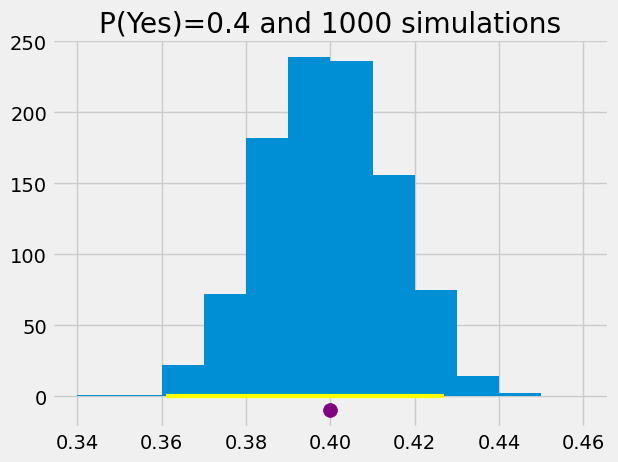

In [23]:
np.random.seed(0)
simulation_results=gallup_sim(1019,0.4,1000)
plt.hist(simulation_results,bins=np.arange(0.34,0.47,0.01))
plt.scatter(0.4, -10, color='purple', s=100)
plt.plot([0.361, 0.427], [0, 0], color='yellow', lw=3, zorder=1);
plt.title("P(Yes)=0.4 and 1000 simulations")
plt.show()

Normally we have only one sample!  What can we do?

**Note....above, we assumed population proportion is 0.4 here, and we never have that information!!**

 - To calculate confidence intervals we need the sampling distribution of $\hat{\theta}$ or $\hat{\theta} −\theta$
    
Intuitively, we can generate the sampling distribution as follows:
- From the population
- Draw samples of the same size
- Calculate their $(\hat\theta-\theta)$ or $\hat\theta$
- Obtain their distribution    
  



...we don't have the population....Normally we have only one sample!

## The Bootstrap

**The bootstrap way:**
    
    
 - Declare the sample to be the "population"

 - Draw samples of the same size from the "new population"

 - Calculate the corresponding estimates, $\hat{\theta}$
 
 - Obtain their distribution

 - The samples are drawn with replacement

<center>
<img src = "https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/Probability/bootstrap.png" width="800" style="display: inline-block; margin: 0" />
</center>

What is bootstrap again?


 - A bootstrap sample is a random sample taken with replacement from the original sample.

 - A bootstrap statistic is the statistic calculated from a bootstrap sample.

 - A bootstrap distribution is the empirical distribution of many bootstrap statistics.

### Basic Bootstrap Method

 Recall that $[\hat{\theta}−U_1, \hat{\theta}−L_1]$ is a confidence interval if
sampling distribution of $\hat{\theta} −\theta$ is known

 - The bootstrap version of Option 1 (replace percentiles with their bootstrap approximations): $[\hat{\theta} −U^b_1, \hat{\theta} −L^b_1 ]$ is called a basic bootstrap CI

<center>
<img src = "https://raw.githubusercontent.com/SusannaLange/Data_118_images/main/images/Probability/bootstrap2.png" width="800" style="display: inline-block; margin: 0" />
</center>

#### Percentile Bootstrap

Replace $W$ with $\hat{W}$  in $[\hat{\theta} −W , \hat{\theta} + W]$

 - The bootstrap version of Option 2 (sampling distribution of $\hat{\theta}$): $[ L^b_1 ,U^b_1]$ is called a percentile bootstrap CI


 - Basic bootstrap CI is based on less assumptions


### For our example

## Bootstrap


**Percentile**

Recall that we are interested in the proportion of Americans who believe that the seriousness of global warming is generally underestimated ($\theta$) and we want to construct a 95% CI based on the sample of n=1019 subjects. 

We use $\hat\theta=403/1019 = 0.3954$.

In [24]:
# my data consist of 403 "yes" and 616 "other" - for simplicity I will code them with 1 and 2

my_data=1+np.zeros(1019)
my_data[403:1019]=2

sum(my_data==1)

403

In [25]:
#wondering where the 403 came from? # We will assume that 403 people (181 male and 222 female) (.34*527=179.18 ->181)
# responded yes to "generally underestimated"

In [26]:
# note the choice I make for the "parameter" replace
bootstrap_sample=np.random.choice(my_data,1019,replace=True)
sum(bootstrap_sample==1)

402

**Repeat the problem (this is the resampling bit)**

In [27]:
# collect the results from nboots samples 
def gallup_resampling(my_data,nboots):
    '''Write a doc string here...'''
    outcomes = np.array([])
    for i in np.arange(nboots):
        bootstrap_sample=np.random.choice(my_data,len(my_data),replace=True)
        num_yes=sum(bootstrap_sample==1) #1 is yes
        outcomes = np.append(outcomes, num_yes/len(my_data))
    return outcomes

<code style="background:Thistle;color:black"> How is this different than a permutation test? </code>

### We can visualize the results

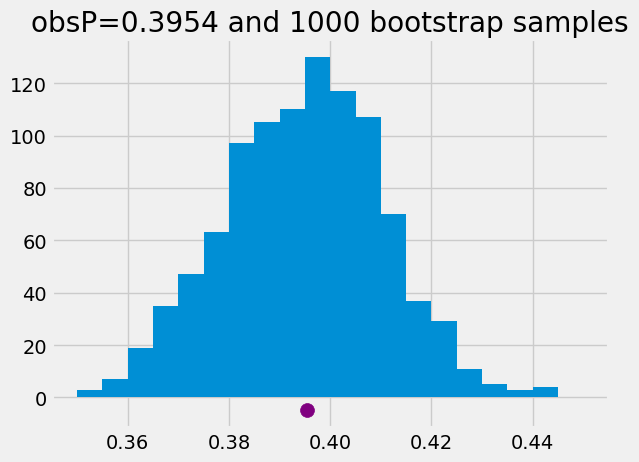

In [28]:
np.random.seed(0)
bootstrap_results=gallup_resampling(my_data,1000)
plt.hist(bootstrap_results,bins=np.arange(0.35,0.45,0.005))
plt.scatter(0.3954, -5, color='purple', s=100) 
plt.title("obsP=0.3954 and 1000 bootstrap samples")
plt.show()

**Goal:** Use this to build a confidence interval!
Since we're using **percentile bootstrap** at a 95% confidence interval, we need the 2.5 and 97.5 percentiles.

In [29]:
np.percentile(bootstrap_results,2.5)

0.36408243375858684

In [30]:
np.percentile(bootstrap_results,97.5)

0.42492639842983315

In [31]:
##Note we can alternately use quantiles here!! note the difference.
np.quantile(bootstrap_results,0.025)
np.quantile(bootstrap_results,0.975)

0.42492639842983315

This gives [0.3640, 0.4249] as a 95% confidence interval. This is called a **percentile bootstrap confidence interval** (note that you might get a slightly different CI every time you run the procedure).

## Bootstrap


**Basic Bootstrap**

Recall that we are interested in the proportion of Americans who believe that the seriousness of global warming is generally underestimated ($\theta$) and we want to construct a 95% CI based on the sample of n=1019 subjects that shows  $\hat\theta=403/1019 = 0.3954$.

The first portion is exactly the same!

Simulating the data and randomly sampling! The difference is the distribution (considering $\hat{\theta}-\theta$) and the CI calculation.

Note we treat the test statistic as the population parameter, hence we use 403/1019 as $\theta$ when computing the distribution of $\hat{\theta}-\theta$.

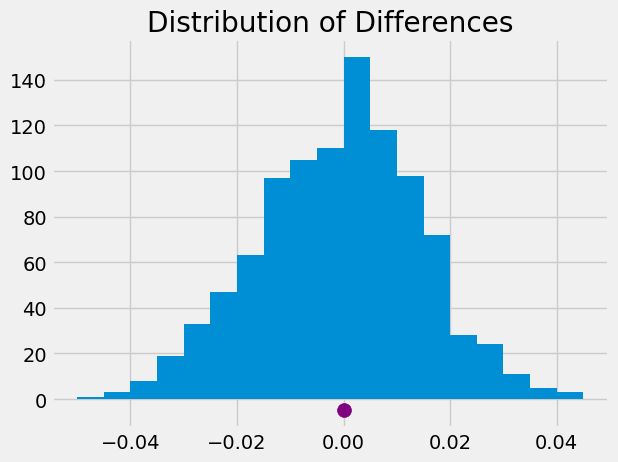

In [32]:
# for the sampling distribution of Option 1
plt.hist(bootstrap_results-403/1019,bins=np.arange(-0.05,0.05,0.005))
plt.scatter(0, -5, color='purple', s=100)
plt.title('Distribution of Differences')
plt.show()

**Goal:** Use this to build a confidence interval!
Since we're using **basic bootstrap** at a 95% confidence interval, we **still** need the 2.5 and 97.5 percentiles.

In [33]:
L_0 = np.percentile(bootstrap_results-403/1019,2.5)
U_0 = np.percentile(bootstrap_results-403/1019,97.5)
L_0

-0.03140333660451422

In [34]:
[403/1019-U_0,403/1019-L_0]

[0.366045142296369, 0.4268891069676153]

In the above simulation, we used only the observed data. It allows us to state that the 95% CI for the true proportion is: [0.365,0.427]  (note that you might get a slightly different CI every time you run the procedure).

This is a **basic bootstrap 95% confidence interval.**